# Project 3 - Pandas & Seaborn 201
---

- Amanda Gild
- gildar23@wfu.edu
- Submission Date:

# Instructions

1. Download the notebook `pandas_seaborn_201_yournamehere.ipynb` and the dataset `Customer Churn.csv` from the course website.

2. Open the notebook on your local computer; Or upload and open it in Google Colab.

3. Replace the placeholder text above with your name, email address, and submission date.

4. This is a simple project made up of mini-tasks. Simply write the code to answer the question, and be sure to display your results!

5. Please submit your notebook in **HTML** on Canvas.

# Who is likely to churn?
You are competing for a job as a business analyst working for a mobile phone company like Verizon, Mint Mobile, or AT&T. As part of the interview process, you have been tasked with exploring which customers are likely to “churn”.

**Customer churn**, also known as customer attrition, occurs when customers stop doing business with a company or stop using a company’s services. The company uses an annual valuation of $1200 per customer so if a customer churns (i.e. switches service) they are out a considerable sum of money.

The company believes...
- Churn is influenced by the *network speed* (5G or 4G LTE) and the *phone model*
- Customers who opt for *paperless billing* are less likely to churn

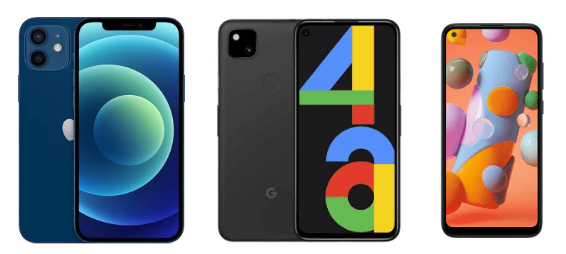

# Some Expectations
- Think about the business problem and how your analysis can address the problem
- Make sure **any chart** you create has: **title, x & y axis labels, and a description of why someone would care to look at it**
- Make sure you spend time understanding what your code does.

## Task 0. Load libraries

Load the following libraries, you may need to install them first!
- Data Manipulation: `pandas`, `numpy`
- Data Visualization：`seaborn`, `matplotlib.pyplot`
- Other: `warnings` (ignore warning messages)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

## Task 1. Stage

1. Use `pd.read_csv()` to read in the `Customer Churn.csv` data file, store it as a data frame named `"df_churn"`

2. Display the first 5 records
> Tip: For wide data, try `df.head().T` to display all the columns

3. Check its shape and respective data types using `info()`


In [3]:
df = pd.read_csv("/content/Customer Churn.csv")
df.head(5).T

,0,1,2,3,4
monthly_minutes,22604.0,17059.0,25848.0,22080.0,23871.0
customer_service_calls,2.0,2.0,2.0,3.0,3.0
streaming_minutes,26525.0,16887.0,26783.0,23649.0,7705.0
total_billed,285.0,201.0,264.0,274.0,236.0
prev_balance,47.0,45.0,44.0,49.0,61.0
late_payments,5.0,5.0,6.0,6.0,5.0
ip_address_asn,16767.0,53966.0,19278.0,16680.0,51308.0
phone_area_code,253.0,241.0,232.0,236.0,243.0
customer_reg_date,2020-04-15,2020-04-12,2020-02-22,2020-08-05,2019-11-16
email_domain,yahoo.com,gmail.com,gmail.com,yahoo.com,gmail.com


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90901 entries, 0 to 90900
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   monthly_minutes         90881 non-null  float64
 1   customer_service_calls  90879 non-null  float64
 2   streaming_minutes       90879 non-null  float64
 3   total_billed            90867 non-null  float64
 4   prev_balance            90879 non-null  float64
 5   late_payments           90881 non-null  float64
 6   ip_address_asn          90884 non-null  float64
 7   phone_area_code         90873 non-null  float64
 8   customer_reg_date       90874 non-null  object 
 9   email_domain            90873 non-null  object 
 10  phone_model             90876 non-null  object 
 11  billing_city            90872 non-null  object 
 12  billing_postal          90873 non-null  float64
 13  billing_state           90875 non-null  object 
 14  partner                 90876 non-null

## Task 2. Cleansing & Profiling (Part I)

Our dataset contains in following varibales:
- **monthly_minutes**: Monthly usage in minutes
- **customer_service_calls**:	# of calls to customer services
- **streaming_minutes**: Monthly streaming in minutes
- **total_billed**:	Total bill amount in $
- **prev_balance**:	Previous balance statement
- **late_payments**: # of late payments
- **ip_address_asn**:	IP address
- **phone_area_code**: Phone area code
- **customer_reg_date**: Customer registration date
- **email_domain**:	Customer email
- **phone_model**: Phone model
- **billing_city**:	Billing city
- **billing_postal**:	Billing zip code
- **billing_state**:	Billing state
- **partner**:	A partnering company who helped initiate the phone contract
- **phone_service**:	phone service
- **multiple_lines**:	multiple lines
- **streaming_plan**:	streaming plan
- **mobile_hotspot**:	mobile hotspot
- **wifi_calling_text**: wifi calling text
- **online_backup**:	online backup
- **device_protection**:	device protection
- **number_phones**:	# of phones obtained
- **contract_code**:	code of the contract with the company
- **currency_code**:	payment currency
- **maling_code**:	mailing code
- **paperless_billing**:	opt for paperless billing
- **payment_method**:	payment method
- **customer_id**:	customer id
- **billing_address**: full billing address
- **gender**:	gender
- **network_speed**:	network speed
- **senior_citizen**:	if the customer is a senior citizen
- **churn**:	if the customer churned


1. Let's begin with cleaning the data types:

- Correct the data types for variable `billing_postal`, `phone_area_code`, `ip_address_asn` to **'object'**
> May use the code like this:
```python
df['variable'] = df['variable'].astype('object')
```

- Correct the data type of variable `churn`, `senior_citizen` to **'bool'**

- Correct the data type of variable `customer_reg_date` to **'datetime64'**
> Hint: `pd.to_datetime()`

2. Select all **numerical variables** using `select_dtypes()`, put their column names in a `list`
> Hint: `df.select_dtypes(include=['int64', 'float64']).columns.to_list()`

3. For Loop Automation: Fire up a for loop that creates a histogram for each variable using `sns.histplot()`, with `hue='churn'`.
>Hint: A good reference is [here](https://colab.research.google.com/drive/193chykBcPCS1AJ4u73cblqY_HbvWW86C?usp=sharing).

4. **Articulate 3 key findings you derived from the generated plots**

In [5]:
#1 Correct the data types for variable billing_postal, phone_area_code, ip_address_asn to 'object'
df['billing_postal'] = df['billing_postal'].astype('object')
df['phone_area_code'] = df['phone_area_code'].astype('object')
df['ip_address_asn'] = df['ip_address_asn'].astype('object')
df['churn'] = df['churn'].astype('bool')
df['senior_citizen'] = df['senior_citizen'].astype('bool')
df['customer_reg_date'] = pd.to_datetime(df['customer_reg_date'])

In [6]:
#2 Select all numerical variables using select_dtypes(), put their column names in a list
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_vars

['monthly_minutes',
 'customer_service_calls',
 'streaming_minutes',
 'total_billed',
 'prev_balance',
 'late_payments',
 'number_phones']

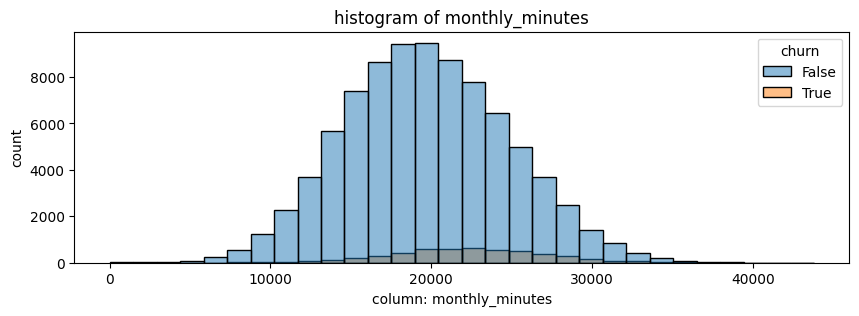

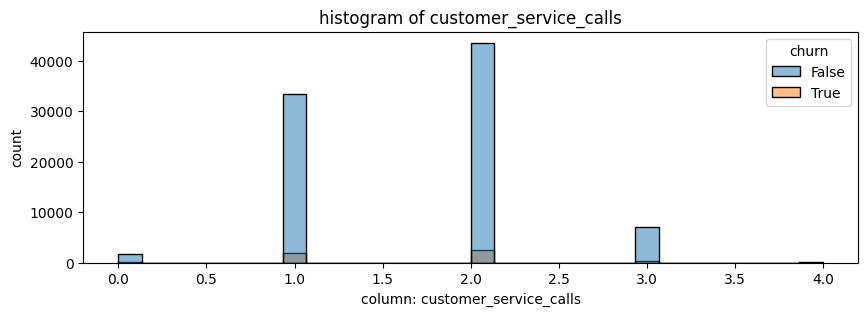

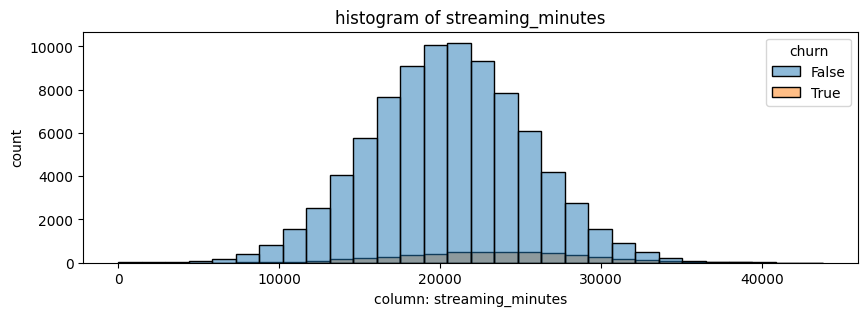

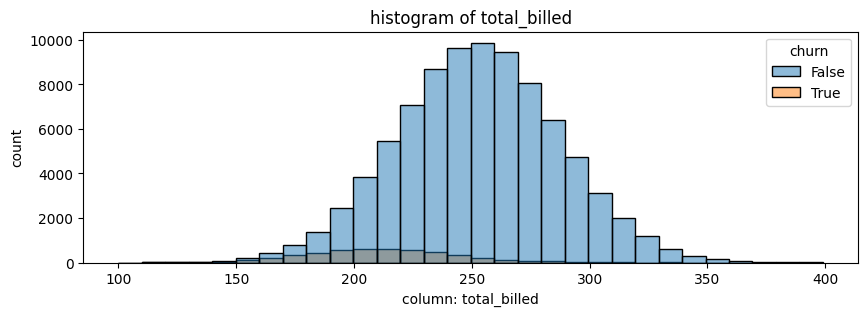

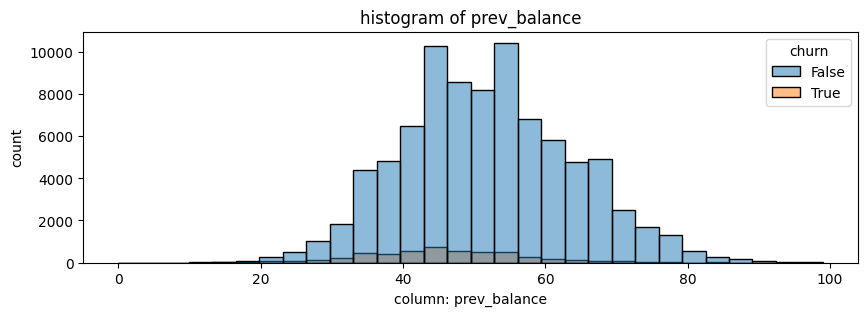

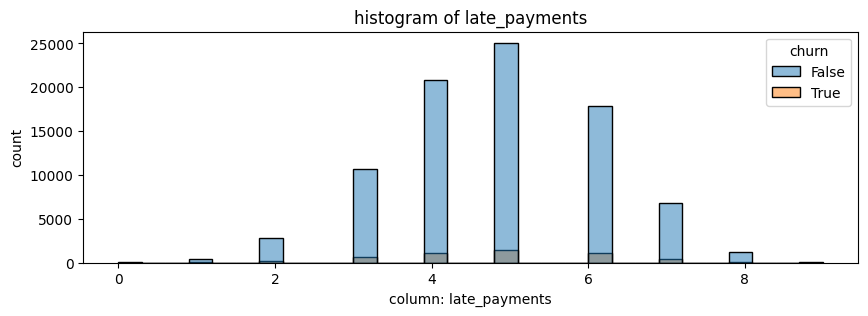

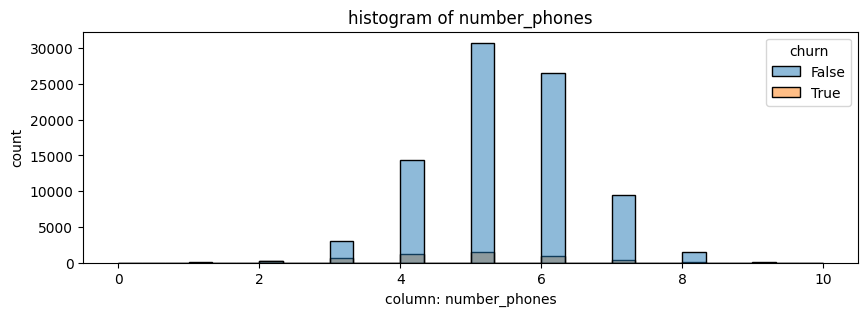

In [7]:
#3 Fire up a for loop that creates a histogram for each variable using sns.histplot(), with hue='churn'
for column in numeric_vars:
  plt.figure(figsize = (10,3))
  sns.histplot(data=df, x = column, hue = 'churn', bins = 30)
  plt.title(f"histogram of {column}")
  plt.xlabel(f"column: {column}")
  plt.ylabel("count")
  plt.show();

Your Findings:

1. Most individuals have 5 phones.

2. Monthly minutes average around 2000.

3. The distribution of previous balance is bimodal

The company can use this information to price optimally by using plans that adhere to this distribution.

## Task 3. Cleansing & Profiling (Part II)

1. Start by selecting all **categorical and boolean variables** using `select_dtypes()`, put their column names in a `list`
> Hint: include=['object','bool']

2. Remove the following variables from the list: `customer_id`, `billing_address`, `billing_city`, `billing_state`, `billing_postal`, `phone_area_code`, `ip_address_asn`
> Hint: `my_list.remove()`

3. Fire up a for loop which creates a countplot for each variable using `sns.countplot()` - Make sure the bars are ordered for easy comparison
> Hint: `order=df_churn[column].value_counts().index`

4. **Articulate 3 key observations you derived from the generated plots**


In [8]:
#1
cat_vars = df.select_dtypes(include = ['object', 'bool']).columns.to_list()

In [9]:
#2 remove
cat_vars.remove('customer_id')
cat_vars.remove('billing_address')
cat_vars.remove('billing_city')
cat_vars.remove('billing_state')
cat_vars.remove('billing_postal')
cat_vars.remove('phone_area_code')
cat_vars.remove('ip_address_asn')

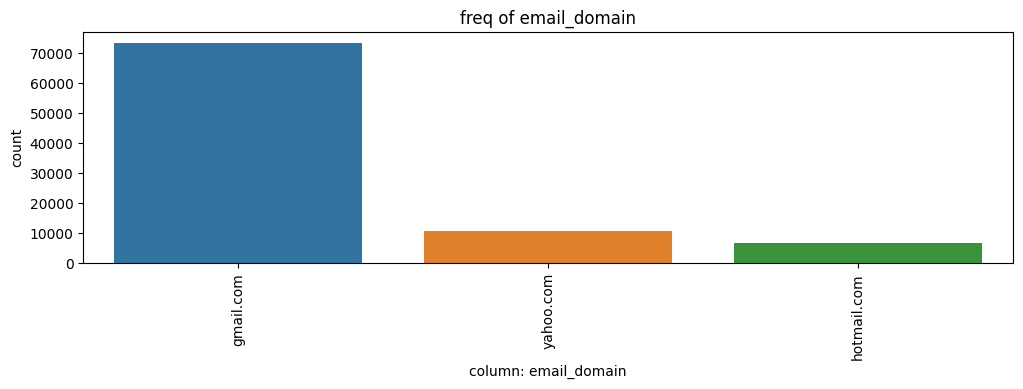

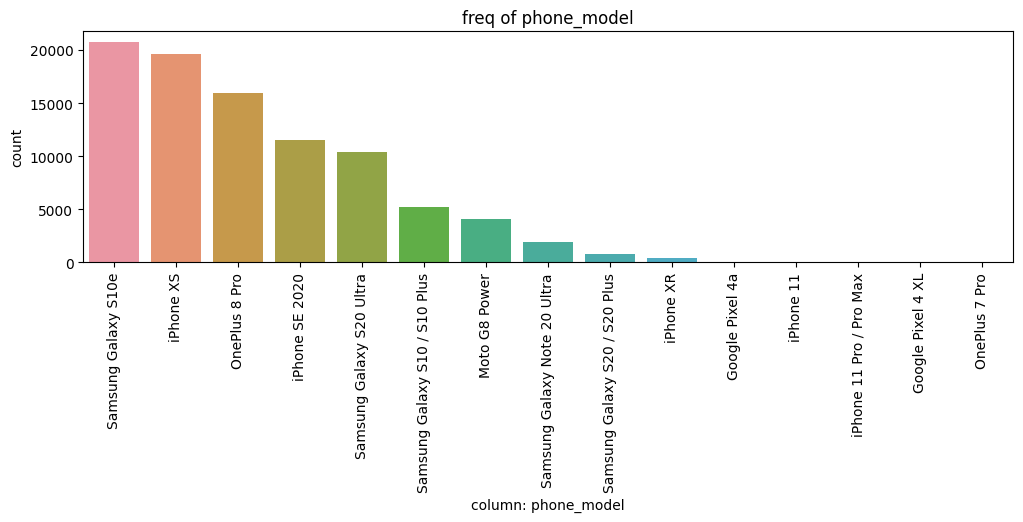

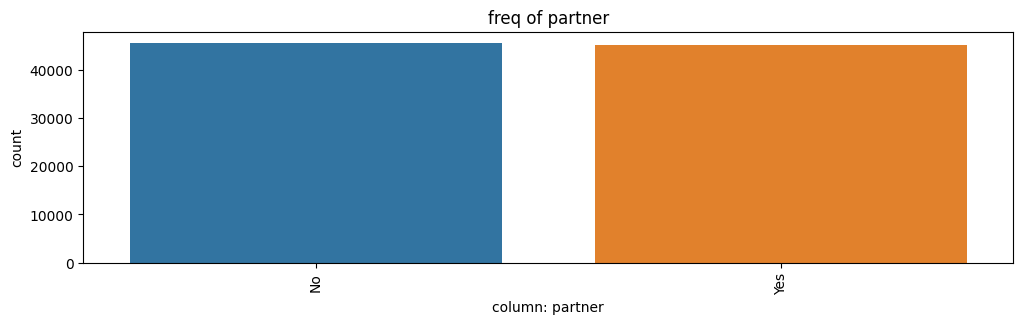

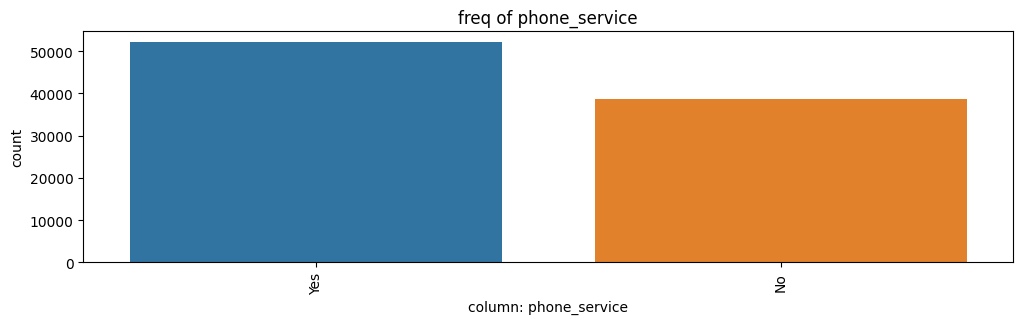

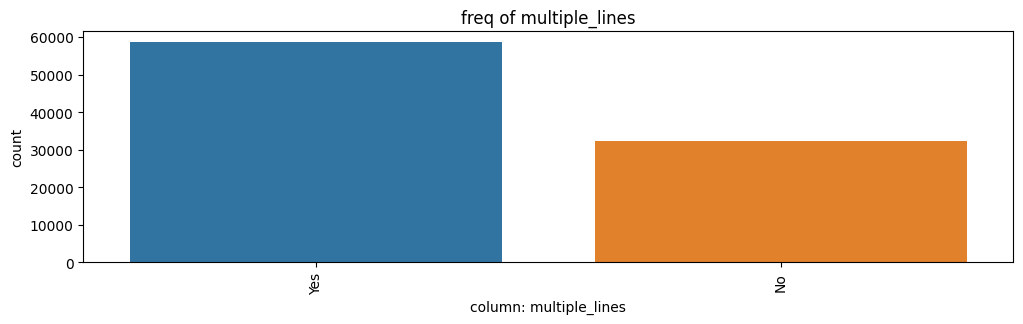

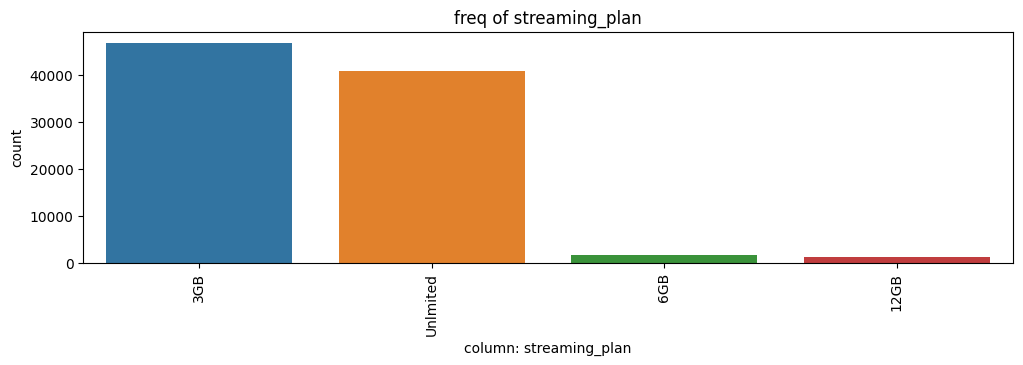

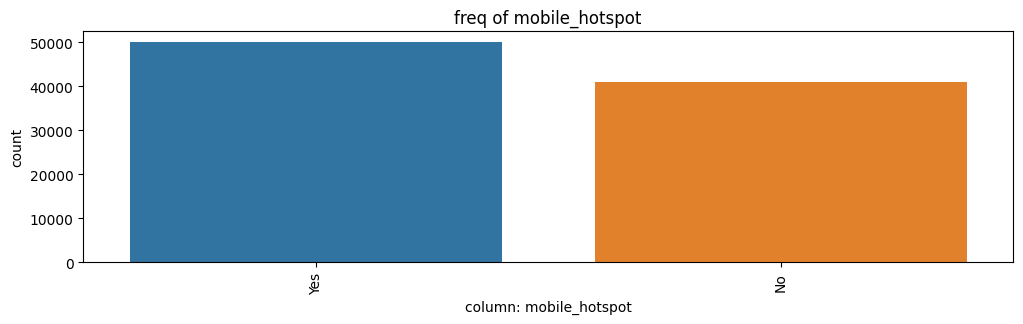

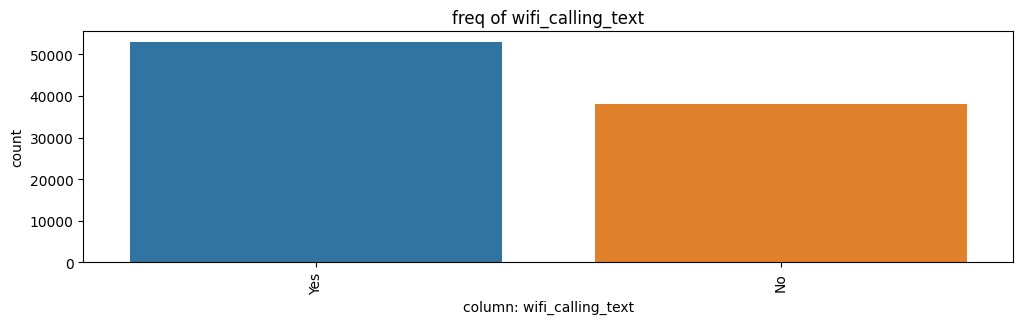

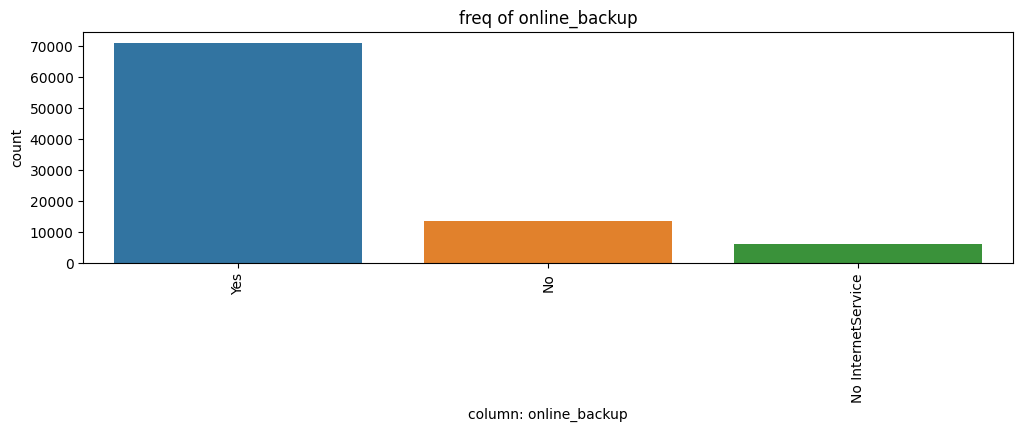

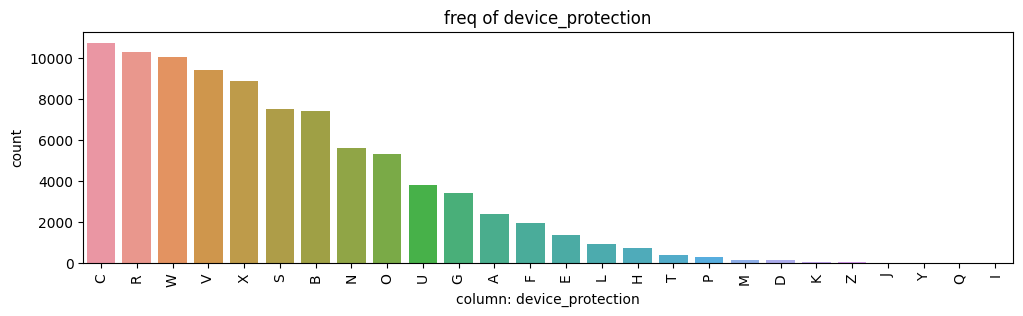

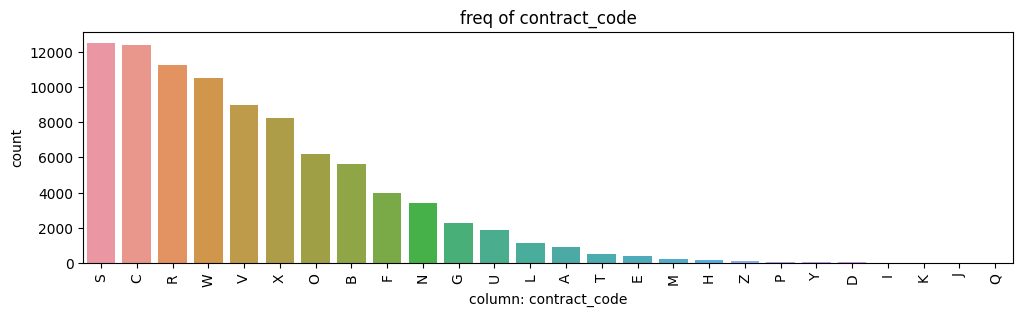

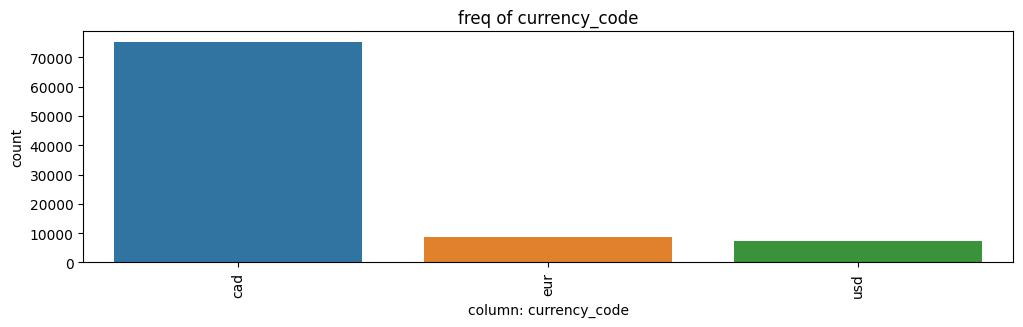

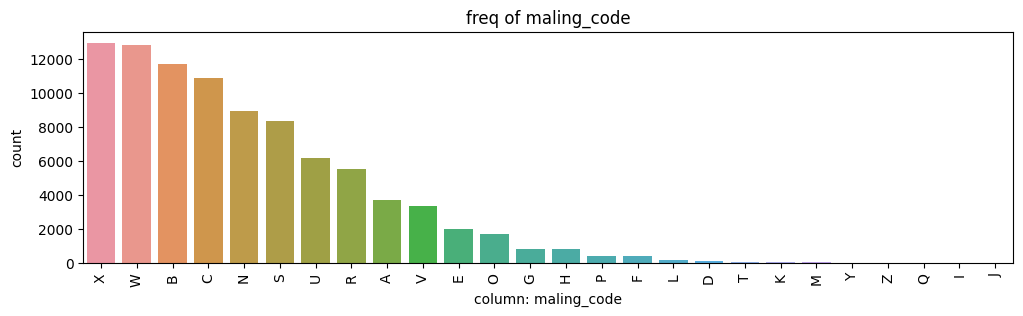

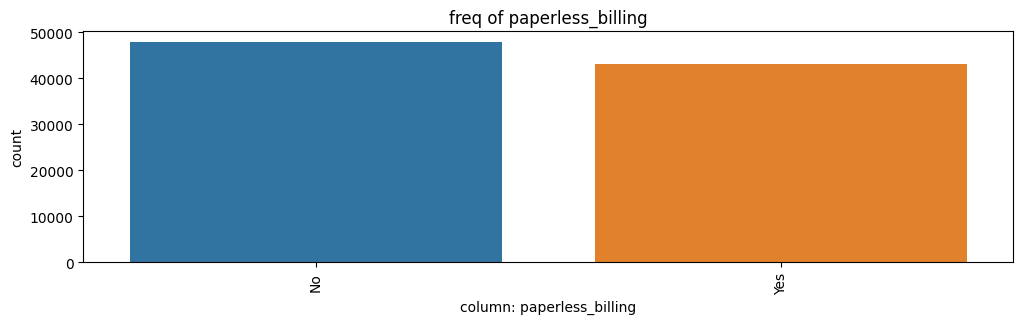

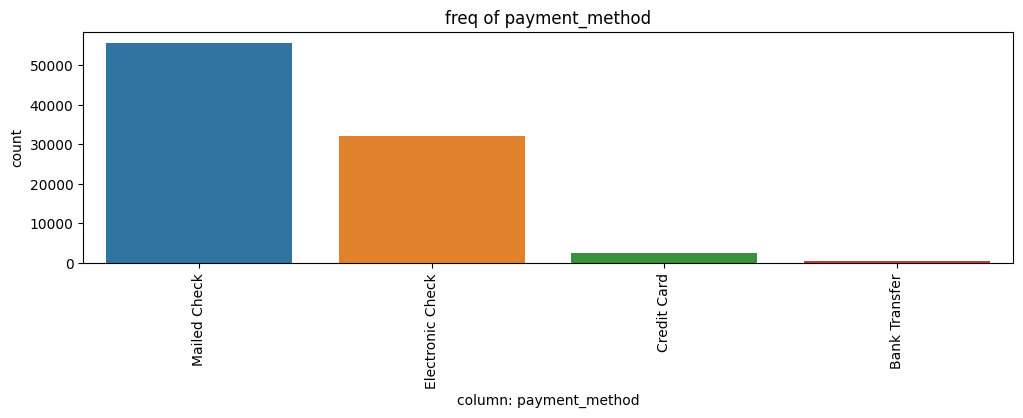

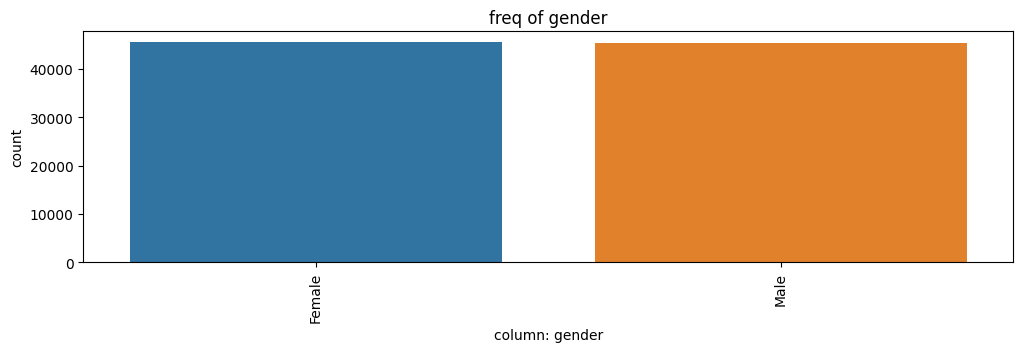

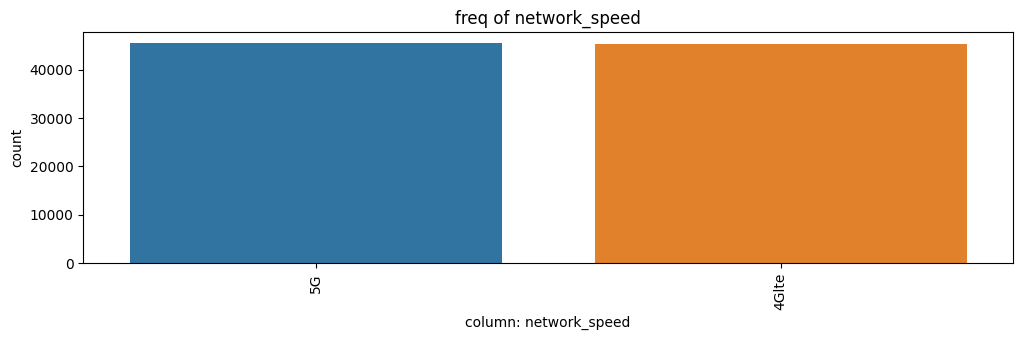

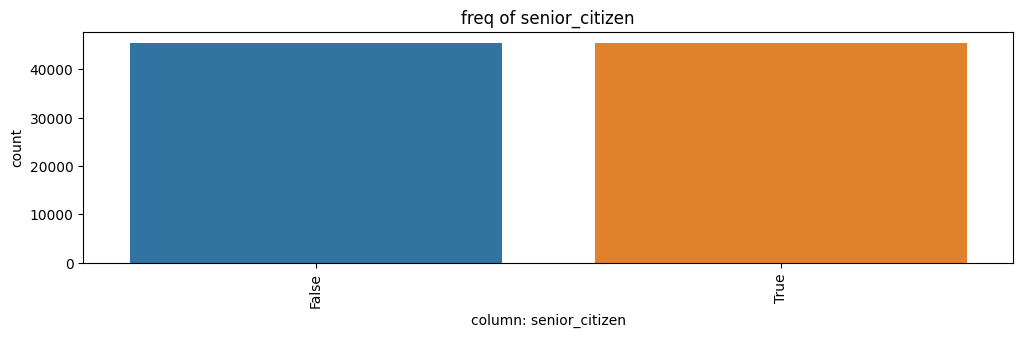

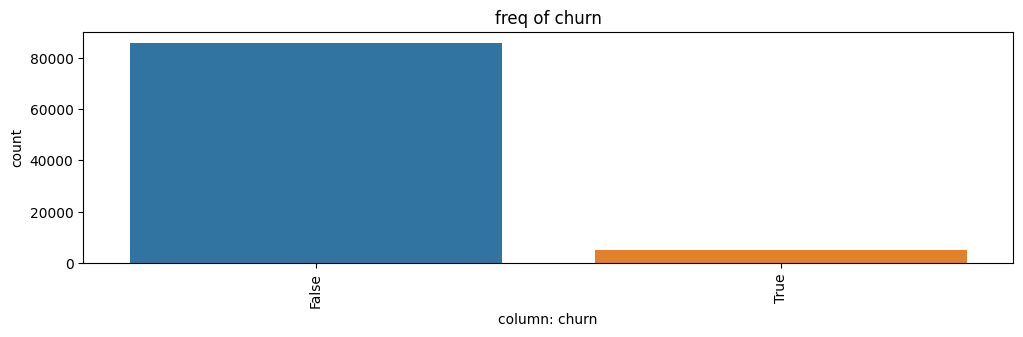

In [10]:
#3Fire up a for loop which creates a countplot for each variable using sns.countplot()
#Make sure the bars are ordered for easy comparison
#order=df_churn[column].value_counts().index
for column in cat_vars:
    plt.figure(figsize=(12,3))
    sns.countplot(data= df,
                  x=column,
                  order = df[column].value_counts().index
    )
    plt.title(f"freq of {column}")
    plt.xlabel(f"column: {column}")
    plt.xticks(rotation=90)
    plt.ylabel("count");

Your Findings:

1. Most customers pay by mailing in checks. Meanwhile, the company thinks that customers who opt for paperless billing are less likely to churn. They should do more research into this and see if it really has an impact.

2. Most currency is Canadian dollars -  there is a large market in Canada. The company should focus their marketing efforts in the US and Europe to increase churn in those markets.

3. Most customers have a Samsung Galaxy phone - the internet company has opportunity for more profits by partnering with Samsung as the service provider.

## Task 4. Analyze & Answer Questions (Part I)

1. States with the most/least churns

- Create a dataset `churn_True` which includes only churned customers
- Use `groupby()` and count `customer_id`
- Identify the **top 5** states with the highest number of churns using `nlargest()`
- Identify the **bottom 3** states with the lowest number of churns using `sort_values()`
- Create a bar chart to visualize the customer count by state - rank your bars in a **descending order**

In [11]:
mask = df['churn']==True
churn_true = df[mask]

In [12]:
grouped_state = churn_true.groupby('billing_state')['customer_id'].count().reset_index()
grouped_state.columns = ['state', 'count']
grouped_state.T

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
state,Alabama,Alaska,California,Colorado,Connecticut,Delaware,Florida,Idaho,Illinois,Iowa,...,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,Wisconsin
count,1,440,3,229,420,55,159,190,174,23,...,4,86,376,1,354,1,12,384,355,1


In [13]:
#top 5
grouped_state.nlargest(5, 'count',keep = 'all')

,state,count
1,Alaska,440
4,Connecticut,420
18,New Jersey,397
31,Virginia,384
26,South Dakota,376


In [14]:
#the bottom four counts are tied
grouped_state.sort_values(['count'], ascending = False).nsmallest(3, 'count', keep = 'all')

,state,count
0,Alabama,1
29,Utah,1
27,Tennessee,1
33,Wisconsin,1


Text(0, 0.5, 'Customer Count')

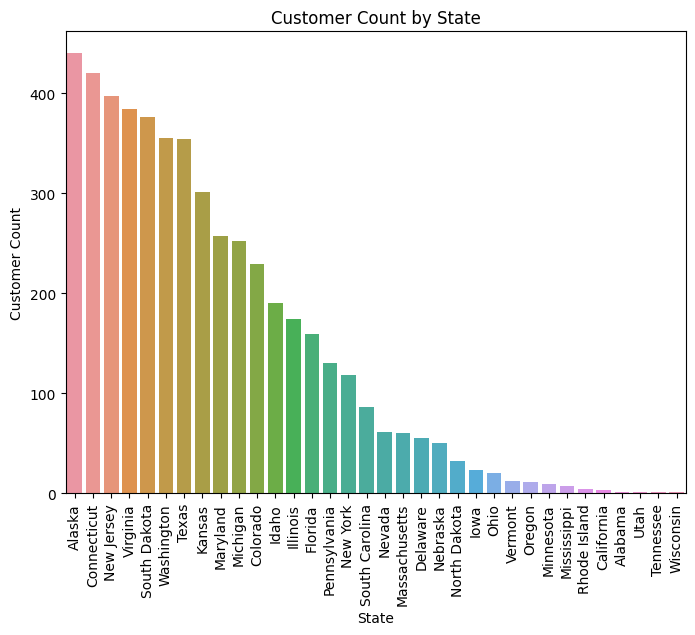

In [15]:
#bar chart to visualize the customer count by state - rank your bars in a descending order
grouped_state = grouped_state.sort_values(by = 'count', ascending = False)
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_state,
            x='state',
            y='count',
            )
plt.title('Customer Count by State')
plt.xlabel('State')
plt.xticks(rotation = 90)
plt.ylabel('Customer Count')

2. Customers with the highest/lowest total bill amount

- Identify the **top 5 customers** with the highest bill amount（i.e., the top group）

- Identify the **bottom 5 customers** with the lowest bill amount（i.e., the bottom group）

- Summarize variables in both groups using `describe()` - What did you find by comparing the summaries?


In [16]:
grouped_customers = df.groupby('customer_id')['total_billed'].sum().reset_index()
grouped_customers.columns = ['customer_id', 'bill']

largest = grouped_customers.nlargest(5, 'bill', keep = 'all')
largest

,customer_id,bill
9973,0-219-77140-5.65503,399.0
31390,0-691-37725-1.22948,397.0
74032,1-63093-682-0.80406,396.0
33021,0-7270-4815-5.64124,395.0
16646,0-365-21782-4.57569,386.0


In [17]:
smallest = grouped_customers.nsmallest(5, 'bill')
smallest

,customer_id,bill
3832,0-08-494183-9.46738,0.0
5789,0-12-783590-3.82680,0.0
6792,0-14-968080-5.28628,0.0
9811,0-216-37291-7.12368,0.0
11605,0-255-24712-5.1539,0.0


In [18]:
largest.describe()

,bill
count,5.000000
mean,394.600000
std,5.029911
min,386.000000
25%,395.000000
50%,396.000000
75%,397.000000
max,399.000000


In [19]:
smallest.describe()

,bill
count,5.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Your Findings:

There is a very wide range of spending. An important piece of information is that many customers have $0 bill, so many of the customers are probably people who have forgotten to cancel their membership. The company needs to find a way to engage these customers more so they have a higher bill.

## Task 5. Analyze & Answer Questions (Part II)

1. Explore the target variable: Create a bar chart to show the percentage of churners?

2. Explore numerical variables: Create **three** boxplots to inform the following questions (Be sure to explain your reasoning based on the chart)
- Does the total bill amount influence churn?
- Does monthly usage influence churn?
- Does monthly streaming influence churn?

3. Explore categorical variables:
  
  The company believes churn is influenced by the **network speed** (5G or 4G LTE) and the **phone model**; customers who opt for **paperless billing** are less likely to churn. Do you agree? Create 3 charts that can effectively test these ideas.

4. Explore any relationships of your interest (i.e. things you found interesting that may influence customer churn). Provide **3-4 Key findings** based on your charts.

In [20]:
#1 Explore the target variable: Create a bar chart to show the percentage of churners?
perc_churn = df[['churn']].value_counts(normalize = True).reset_index()
perc_churn.columns = ['churn?', 'percent']
perc_churn


,churn?,percent
0,False,0.94527
1,True,0.05473


Text(0, 0.5, 'Percent')

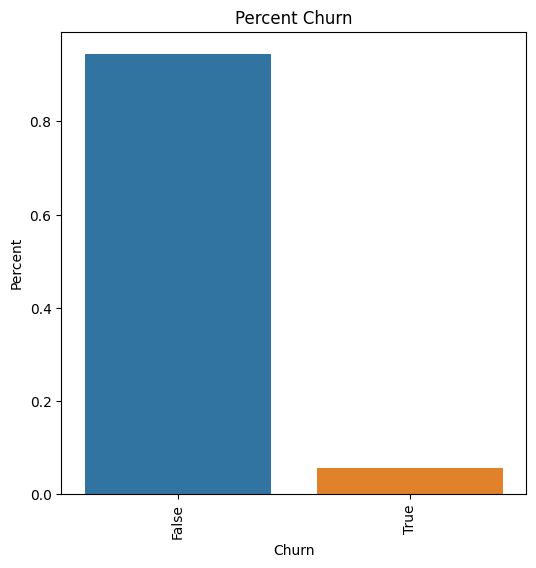

In [21]:
plt.figure(figsize=(6, 6))
sns.barplot(data=perc_churn,
            x='churn?',
            y='percent',
            )
plt.title('Percent Churn')
plt.xlabel('Churn')
plt.xticks(rotation = 90)
plt.ylabel('Percent')

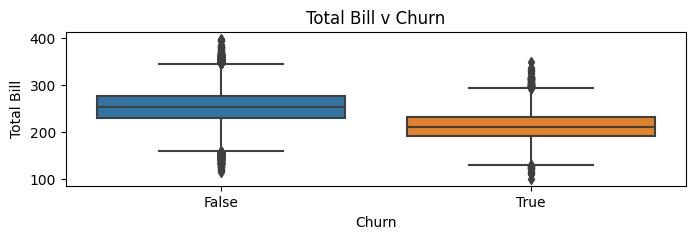

In [24]:
#Explore numerical variables: Create three boxplots to inform the following questions (Be sure to explain your reasoning based on the chart)
# Does the total bill amount influence churn?

plt.figure(figsize=(8, 2))
sns.boxplot(data= df,
             y='total_billed',
             x='churn',
             )
plt.title('Total Bill v Churn')
plt.xlabel('Churn')
plt.ylabel('Total Bill')
plt.show()

Total bill has an impact on churn - the median for churners is about 200, while the median for non-churners is about 250.

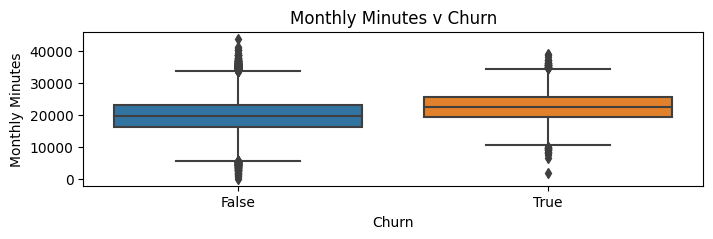

In [28]:
# Does monthly usage influence churn?
plt.figure(figsize=(8, 2))
sns.boxplot(data= df,
             y='monthly_minutes',
             x='churn',
             )
plt.title('Monthly Minutes v Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Minutes')
plt.show()

Monthly usage has a slight impact on churn - the median usage minutes  for churners is slightly higher than for non-churners.


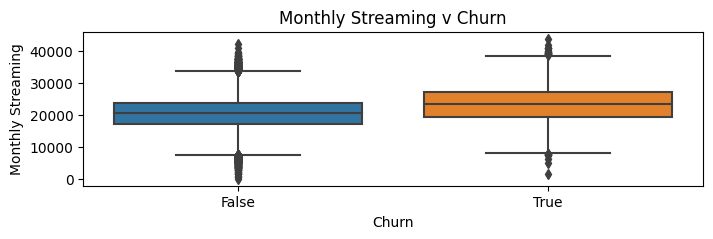

In [31]:
# Does monthly strea influence churn?
plt.figure(figsize=(8, 2))
sns.boxplot(data= df,
             y='streaming_minutes',
             x='churn',
             )
plt.title('Monthly Streaming v Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Streaming')
plt.show()

Monthly streaming has a slight impact on churn - the median streaming for churners is slightly higher than for non-churners.


Text(0, 0.5, 'Percent Churn')

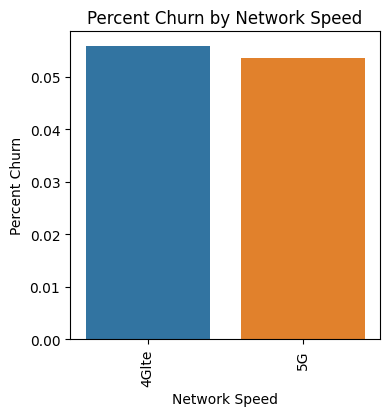

In [50]:
#network speed
plt.figure(figsize=(4, 4))
speed = df.groupby('network_speed')['churn'].mean() #group
sns.barplot(
            x= speed.index,
            y= speed.values
            )
plt.title('Percent Churn by Network Speed')
plt.xlabel('Network Speed')
plt.xticks(rotation = 90)
plt.ylabel('Percent Churn')

Text(0, 0.5, 'Percent')

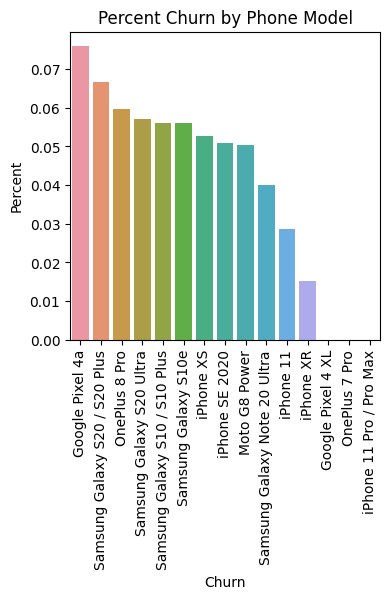

In [54]:
#phone model
plt.figure(figsize=(4, 4))
model = df.groupby('phone_model')['churn'].mean().sort_values(ascending = False) #group
sns.barplot(
            x= model.index,
            y= model.values
            )
plt.title('Percent Churn by Phone Model')
plt.xlabel('Churn')
plt.xticks(rotation = 90)
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

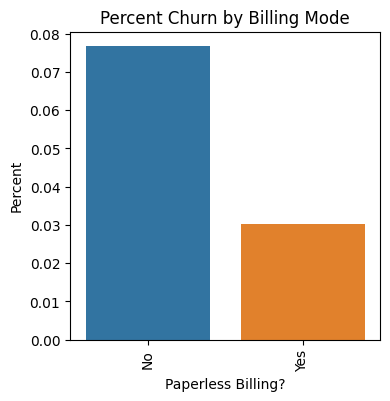

In [56]:
#paperless or paper billing
plt.figure(figsize=(4, 4))
model = df.groupby('paperless_billing')['churn'].mean() #group
sns.barplot(
            x= model.index,
            y= model.values
            )
plt.title('Percent Churn by Billing Mode')
plt.xlabel('Paperless Billing?')
plt.xticks(rotation = 90)
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

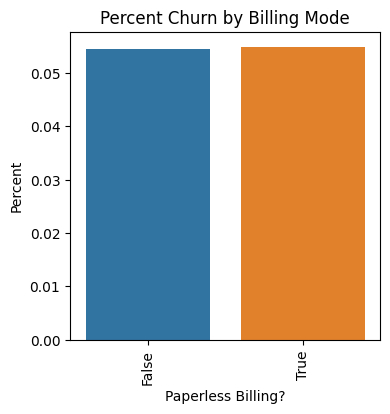

In [57]:
#senior citizen?
plt.figure(figsize=(4, 4))
model = df.groupby('senior_citizen')['churn'].mean() #group
sns.barplot(
            x= model.index,
            y= model.values
            )
plt.title('Percent Churn if Senior Citizen')
plt.xlabel('Senior Citizen?')
plt.xticks(rotation = 90)
plt.ylabel('Percent')

Your Findings:

1. It turns out that paper billing has a higher churn rate, which is not what the company originally expected.

2. Network speed does not have much impact on churn, which is also not what the company originally expected.

3. Google Pixel 4a has the highest churn rate. The internet company should focus on targeting individuals with phone types that don't churn as much - they can partner with the phone companies to provide a lower cost service, but gain more customers.

4. I thought senior citizens would churn less, but being a senior citizen seems to have less impact.



## Finally
Wrap this up in a notebook and convert it to **HTML**, to exceed the bar - make sure things look good.

In [ ]:
%%shell
jupyter nbconvert --to html "/content/intro_to_python_AmandaGild.ipynb"

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
